In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [35]:
data = pd.read_csv("web-traffic.csv")

data["date"] = pd.to_datetime(data["date"], dayfirst=True, format='%d/%m/%y')
print(data.head(10))


        date  users
0 2020-07-01   2324
1 2020-07-02   2201
2 2020-07-03   2146
3 2020-07-04   1666
4 2020-07-05   1433
5 2020-07-06   2195
6 2020-07-07   2240
7 2020-07-08   2295
8 2020-07-09   2279
9 2020-07-10   2155


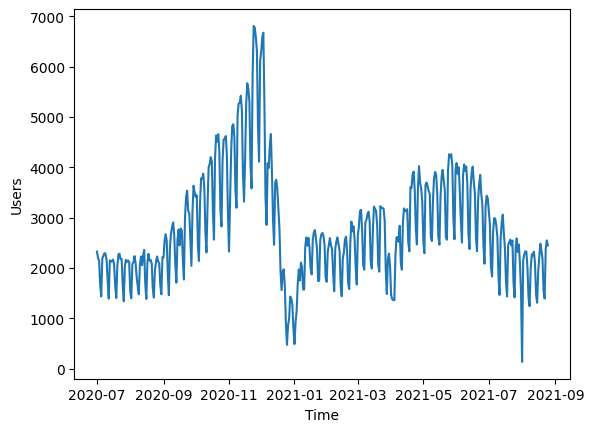

In [36]:
fig, ax = plt.subplots()

ax.plot(data["date"], data["users"])
ax.set_xlabel("Time")
ax.set_ylabel("Users")
plt.show()

In [37]:
windows_size = 10
def create_ts_data(data, windows_size):
    i = 1
    while i < windows_size:
        data["users_{}".format(i)] = data["users"].shift(-i)
        i += 1
    data["target"] = data["users"].shift(-i)
    data=data.dropna(axis=0)
    return data

data = create_ts_data(data, windows_size)
print(data.head(10))

        date  users  users_1  users_2  users_3  users_4  users_5  users_6  \
0 2020-07-01   2324   2201.0   2146.0   1666.0   1433.0   2195.0   2240.0   
1 2020-07-02   2201   2146.0   1666.0   1433.0   2195.0   2240.0   2295.0   
2 2020-07-03   2146   1666.0   1433.0   2195.0   2240.0   2295.0   2279.0   
3 2020-07-04   1666   1433.0   2195.0   2240.0   2295.0   2279.0   2155.0   
4 2020-07-05   1433   2195.0   2240.0   2295.0   2279.0   2155.0   1737.0   
5 2020-07-06   2195   2240.0   2295.0   2279.0   2155.0   1737.0   1391.0   
6 2020-07-07   2240   2295.0   2279.0   2155.0   1737.0   1391.0   2150.0   
7 2020-07-08   2295   2279.0   2155.0   1737.0   1391.0   2150.0   2121.0   
8 2020-07-09   2279   2155.0   1737.0   1391.0   2150.0   2121.0   2136.0   
9 2020-07-10   2155   1737.0   1391.0   2150.0   2121.0   2136.0   2166.0   

   users_7  users_8  users_9  target  
0   2295.0   2279.0   2155.0  1737.0  
1   2279.0   2155.0   1737.0  1391.0  
2   2155.0   1737.0   1391.0  2150.

In [38]:
train_ratio = 0.8
x = data.drop(["date", "target"], axis=1)
y = data["target"]
num_samples = len(data)
x_train = x[:int(num_samples*train_ratio)]
y_train = y[:int(num_samples*train_ratio)]
x_test = x[int(num_samples*train_ratio):]
y_test = y[int(num_samples*train_ratio):]

MAE :181.50771084337347
MSE :63456.066072289155
R2 :0.8940859389462863


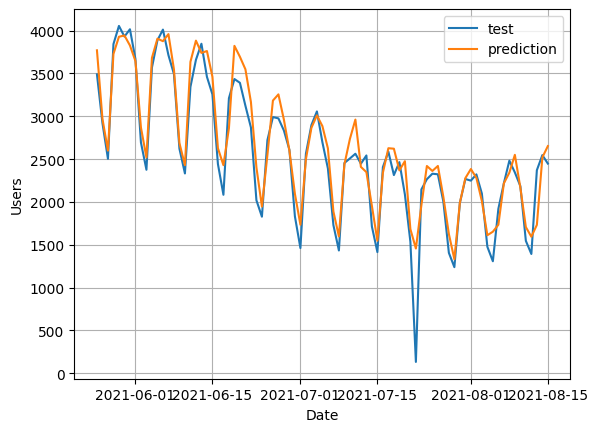

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(x_test)
print(f"MAE :{mean_absolute_error(y_test, y_pred)}")
print(f"MSE :{mean_squared_error(y_test, y_pred)}")
print(f"R2 :{r2_score(y_test, y_pred)}")

fig, ax = plt.subplots()
# ax.plot(data["date"][:int(num_samples*train_ratio)], y_train, label="train")
ax.plot(data["date"][int(num_samples*train_ratio):], y_test, label = "test")
ax.plot(data["date"][int(num_samples*train_ratio):], y_pred, label = "prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Users")
ax.legend()
ax.grid()

plt.show()

MAE :280.16904761904766
MSE :150664.26813333333
R2 :0.7557661406813634


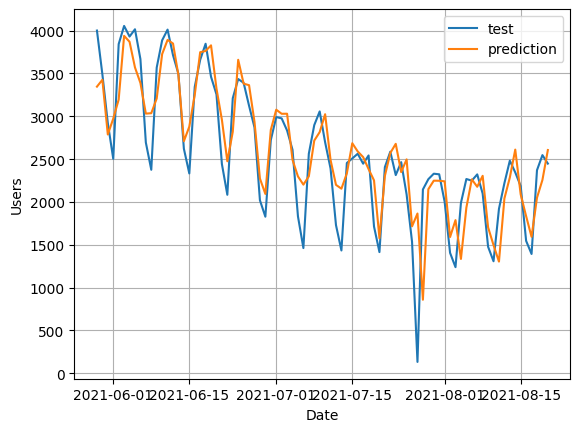

MAE :186.06684510531844
MSE :86118.25156788353
R2 :0.8562606489975428


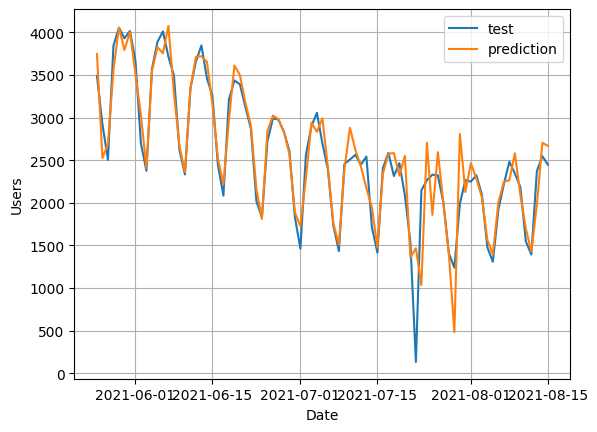

In [41]:
model = LinearRegression()

model.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(x_test)
print(f"MAE :{mean_absolute_error(y_test, y_pred)}")
print(f"MSE :{mean_squared_error(y_test, y_pred)}")
print(f"R2 :{r2_score(y_test, y_pred)}")

fig, ax = plt.subplots()
# ax.plot(data["date"][:int(num_samples*train_ratio)], y_train, label="train")
ax.plot(data["date"][int(num_samples*train_ratio):], y_test, label = "test")
ax.plot(data["date"][int(num_samples*train_ratio):], y_pred, label = "prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Users")
ax.legend()
ax.grid()

plt.show()

MAE :1590.5327999524357
MSE :4055265.9373906385
R2 :-5.768615053957802


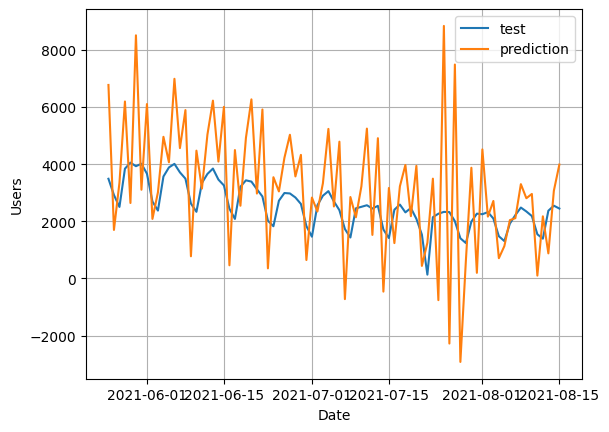

In [40]:
from sklearn.svm import SVR

model =  SVR(kernel="linear", C=100, gamma="auto")

model.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(x_test)
print(f"MAE :{mean_absolute_error(y_test, y_pred)}")
print(f"MSE :{mean_squared_error(y_test, y_pred)}")
print(f"R2 :{r2_score(y_test, y_pred)}")

fig, ax = plt.subplots()
# ax.plot(data["date"][:int(num_samples*train_ratio)], y_train, label="train")
ax.plot(data["date"][int(num_samples*train_ratio):], y_test, label = "test")
ax.plot(data["date"][int(num_samples*train_ratio):], y_pred, label = "prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Users")
ax.legend()
ax.grid()

plt.show()

MAE :161.00206324862705
MSE :58903.60763697069
R2 :0.9016844144035189


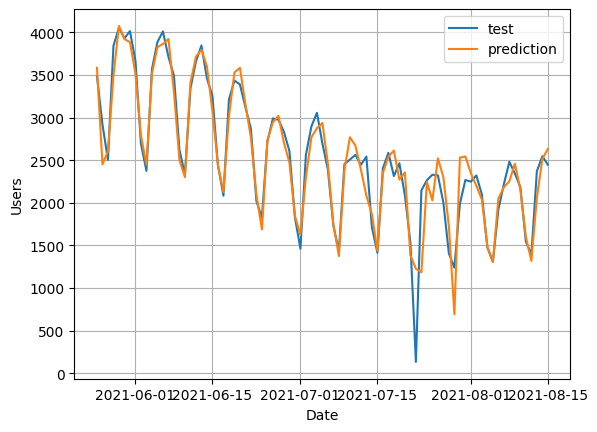

In [39]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(64,128), activation='relu', solver='adam')
model.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(x_test)
print(f"MAE :{mean_absolute_error(y_test, y_pred)}")
print(f"MSE :{mean_squared_error(y_test, y_pred)}")
print(f"R2 :{r2_score(y_test, y_pred)}")

fig, ax = plt.subplots()
# ax.plot(data["date"][:int(num_samples*train_ratio)], y_train, label="train")
ax.plot(data["date"][int(num_samples*train_ratio):], y_test, label = "test")
ax.plot(data["date"][int(num_samples*train_ratio):], y_pred, label = "prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Users")
ax.legend()
ax.grid()

plt.show()

In [ ]:
# Model MLP là tốt nhất